## Viajes de Taxis Zuber

## 1. Contenido <a name="content"></a>

* [1 Contenido](#content)
* [2 Introducción](#intro)
* [3 Inicialización](#inic)
    * [3.1 Cargar Librerias](#library)
    * [3.2 Cargar Datos](#data)
* [4 Exploración y preparación los datos](#exp) 
    * [4.1 Company Dataset](#company)
    * [4.2 Trip Dataset](#trip)
    * [4.3 Weather Dataset](#weather)
* [5 Analisis de los datos](#analysis) 
* [6 Prueba de hipótesis](#hypothesis)    
* [7 Conclusión general](#end)

## 2. Introducción <a name="intro"></a>

En el presente proyecto se estudiaran dos dataframes entregados por la empresa Zuber, una empresa de viajes compartidos que se está lanzando en Chicago, para analizar los barrios principales donde finalizan los viajes y cantidad de viajes vs empresas de taxis. Posteriormente se realizara una prueba de hipótesis para comprobar si el tiempo climático afecta la duración de los viajes.

## 3. Inicialización <a name="inic"></a>

### 3.1 Cargar librerias <a name="library"></a>

Se procede a cargar las librerías que se utilizaran en el proyecto.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

### 3.2 Cargar datos <a name="data"></a>

Se procede a cargar los datos.

In [2]:
company = pd.read_csv("datasets/project_sql_result_01.csv")
trips = pd.read_csv("datasets/project_sql_result_04.csv")
weather_trips = pd.read_csv("datasets/project_sql_result_07.csv")

## 4. Exploración y preparación los datos <a name="exp"></a>

A continuación, observaremos las bases de datos compartidas por Zuber para buscar posibles problemas existentes que deban ser tratados para poder realizar un posterior correcto análisis sobre la misma, buscaremos valores ausentes, duplicados, tipos de datos errones o valores que no tengan un sentido lógico dentro del contexto en que se encuentran. Dentro de la misma sección procederemos a corregir los problemas que se encuentren.

### 4.1 Company Dataset <a name="company"></a>

In [3]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [4]:
company.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [5]:
len(company["company_name"].unique())

64

In [6]:
len(company[company["trips_amount"]>0])

64

Podemos apreciar que no hay valores ausentes en el dataframe, los tipos de datos son correctos para las dos columnas, no existen valores duplicados en los nombres de las compañías y no existen valores extraños en las cantidades de viajes por compañía, debido a lo anterior no se hará ninguna intervención en este dataframe.

Para finalizar esta sección observaremos las estadisticas correspondientes al número de viajes por compañia.

In [7]:
company['trips_amount'].describe()

count       64.000000
mean      2145.484375
std       3812.310186
min          2.000000
25%         20.750000
50%        178.500000
75%       2106.500000
max      19558.000000
Name: trips_amount, dtype: float64

Podemos apreciar que el promedio de viajes es de alrededor de 2145 pero que la mediana es de alrededor de 178 viajes, lo que indica una asimetría positiva en la cantidad de viajes y explica la alta desviación estándar de 2106 viajes.

### 4.2 Trips Dataset <a name="trip"></a>

In [8]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [9]:
trips.head().sort_values(by="average_trips", ascending=False)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [10]:
len(trips["dropoff_location_name"].unique())

94

In [11]:
len(trips[trips["average_trips"]>0])

94

En este dataframe tampoco podemos apreciar valores ausentes, tipos de datos incorrectos, valores duplicados en los nombres de los barrios donde terminan los viajes ni valores extraños en los promedios de los viajes, debido a lo anterior no se hará ninguna intervención en este dataframe.

Igual que en el caso anterior, observaremos los datos estadísticos de la columna "average_trips".

In [12]:
trips['average_trips'].describe()

count       94.000000
mean       599.953728
std       1714.591098
min          1.800000
25%         14.266667
50%         52.016667
75%        298.858333
max      10727.466667
Name: average_trips, dtype: float64

Nuevamente podemos observar que el promedio de viajes es muy superior a la media de los mismos, 600 vs 52 viajes, lo que indica una alta asimetría positiva respaldada por la alta desviación estándar de 1714 viajes aproximadamente.

### 4.3 Weather Dataset <a name="weather"></a>

In [13]:
weather_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [14]:
weather_trips.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [15]:
weather_trips["weather_conditions"].unique()

array(['Good', 'Bad'], dtype=object)

In [16]:
len(weather_trips[weather_trips["duration_seconds"]>0])

1062

In [17]:
len(weather_trips[weather_trips["duration_seconds"]>=0])

1068

Podemos apreciar que no existen valores ausentes y por el lado de la columna de duración de los viajes en segundos hay 6 valores que son iguales a 0, lo que se puede explicar por viajes no concretados y a su vez no es una cantidad de filas que vaya a afectar el análisis por lo que no se intervendrá. Con respecto a los tipos de datos, dos columnas presentan tipos de datos que no son los correctos y deben ser corregidos, start_ts debería corresponder con datetime y duration_seconds debería ser int por lo que procederemos a corregirlos.

In [18]:
weather_trips["start_ts"] = pd.to_datetime(weather_trips["start_ts"], format='%Y-%m-%d %H:%M:%S')

In [19]:
weather_trips["duration_seconds"] = weather_trips["duration_seconds"].astype({'duration_seconds':'int'})

In [20]:
weather_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   int32         
dtypes: datetime64[ns](1), int32(1), object(1)
memory usage: 21.0+ KB


Finalmente, como en los casos anteriores, observaremos las estadísticas de la columna "duration_seconds".

In [21]:
weather_trips["duration_seconds"].describe()

count    1068.000000
mean     2071.731273
std       769.461125
min         0.000000
25%      1438.250000
50%      1980.000000
75%      2580.000000
max      7440.000000
Name: duration_seconds, dtype: float64

Podemos apreciar, como en todos los casos anteriores, que existe una asimetría positiva en los datos, al ser el promedio de tiempo en segundos de viaje menor que la mediana de los mismos. Esta asimetría no es tan marcada como en el caso anterior, respaldada por una desviación estándar de 769 segundos.

## 5. Análisis de los datos <a name="analysis"></a>

Comenzaremos definiendo una función para trazar gráficos de barras, posteriormente realizaremos un análisis a partir de lo que observemos en los dos primeros dataframes entregados por Zuber.

In [22]:
def bar_graph_sorted(data, columna, valores, funcion, ylabel, title):
    bar_graph_sorted = data.pivot_table(index=columna, values=valores, aggfunc=funcion).sort_values(by=valores, ascending=False)
    bar_graph_sorted.plot(kind="bar", figsize=(15, 5))
    plt.ylabel(ylabel)
    plt.title(title)

Primero analizaremos el grafico correspondiente a las compañías de taxis vs la cantidad de viajes realizados por las mismas.

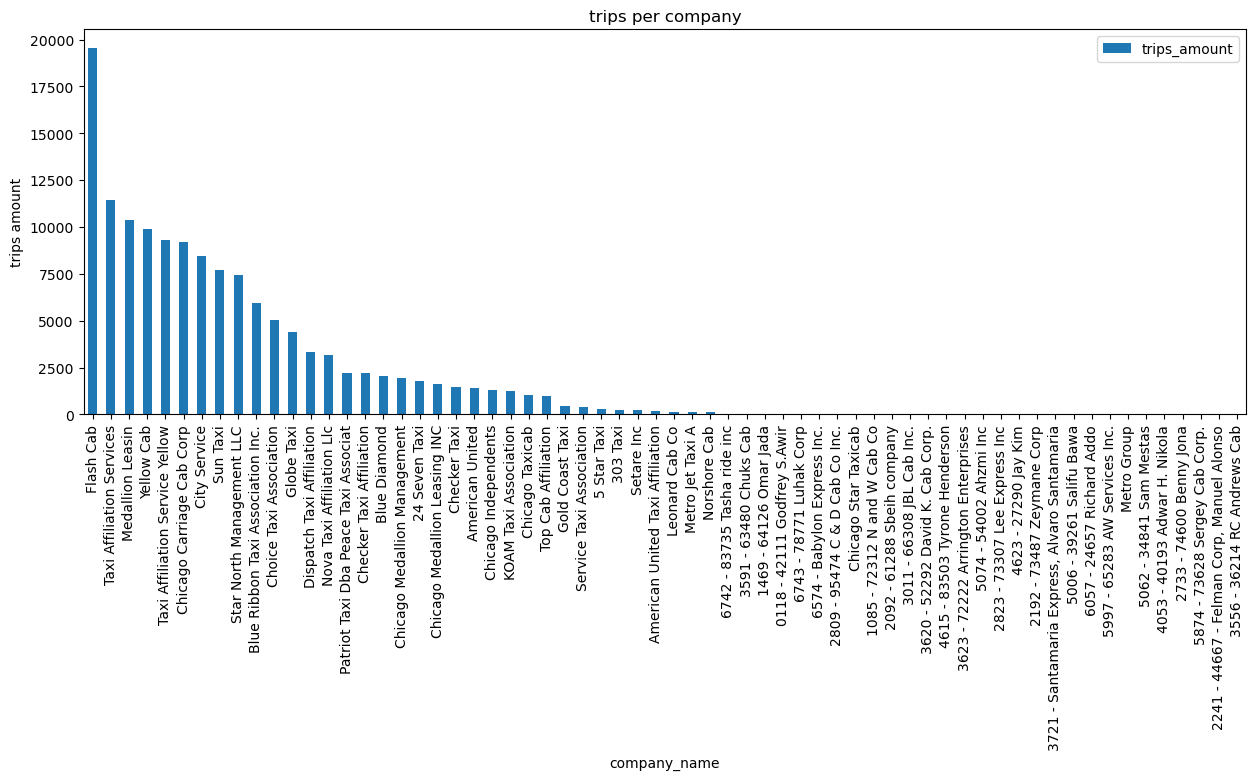

In [23]:
bar_graph_sorted(company, "company_name", "trips_amount", "sum", "trips amount", "trips per company")

Observando el grafico podemos concluir que la mayoría de los viajes se concentran en alrededor de 10 a 14 compañías de taxis, siendo la más popular de todas "Flash Cab", prácticamente doblando el número de viajes con respecto a la compañía que le sigue en segundo lugar "Taxi Affiliation Services". De lo anterior podemos rescatar que aunque existe un pool bastante amplio de compañías de taxi en Chicago, 64 compañías, la mayor parte del mercado se concentra en un grupo reducido de estas habiendo una clara preferencia por parte de los pasajeros.  

Continuaremos con el análisis del segundo grafico correspondiente la cantidad de viajes promedios versus los 10 barrios más populares donde finalizan estos viajes.

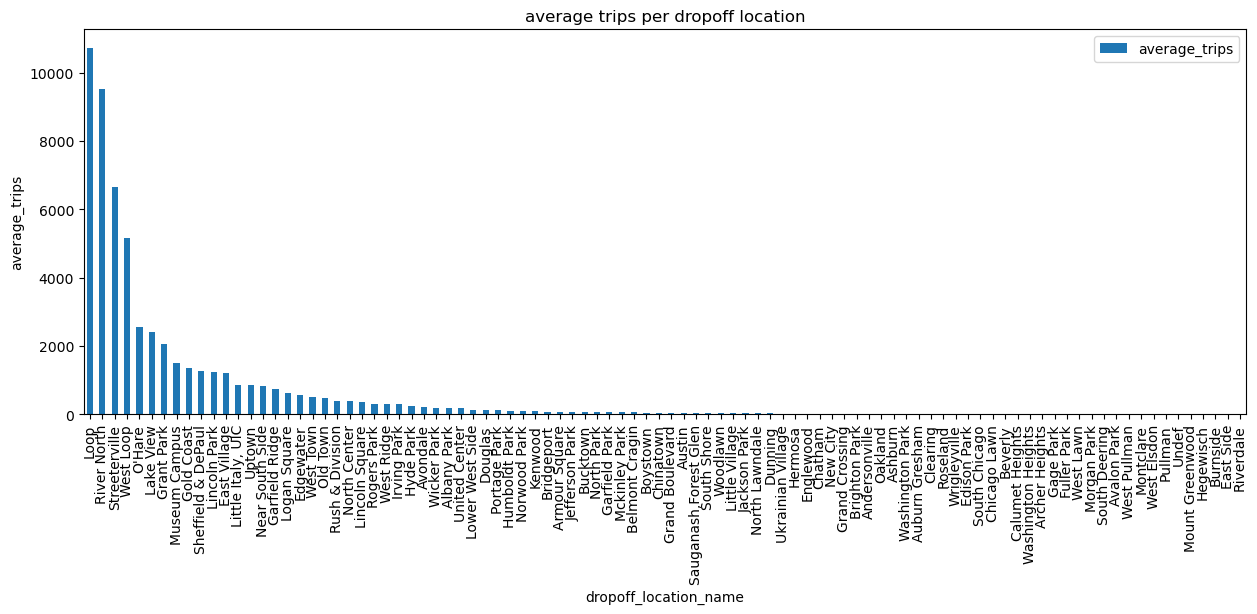

In [24]:
bar_graph_sorted(trips, "dropoff_location_name", "average_trips", "sum", "average_trips", "average trips per dropoff location")

In [25]:
trips_shorted = trips.head(10).sort_values(by="average_trips", ascending=False)

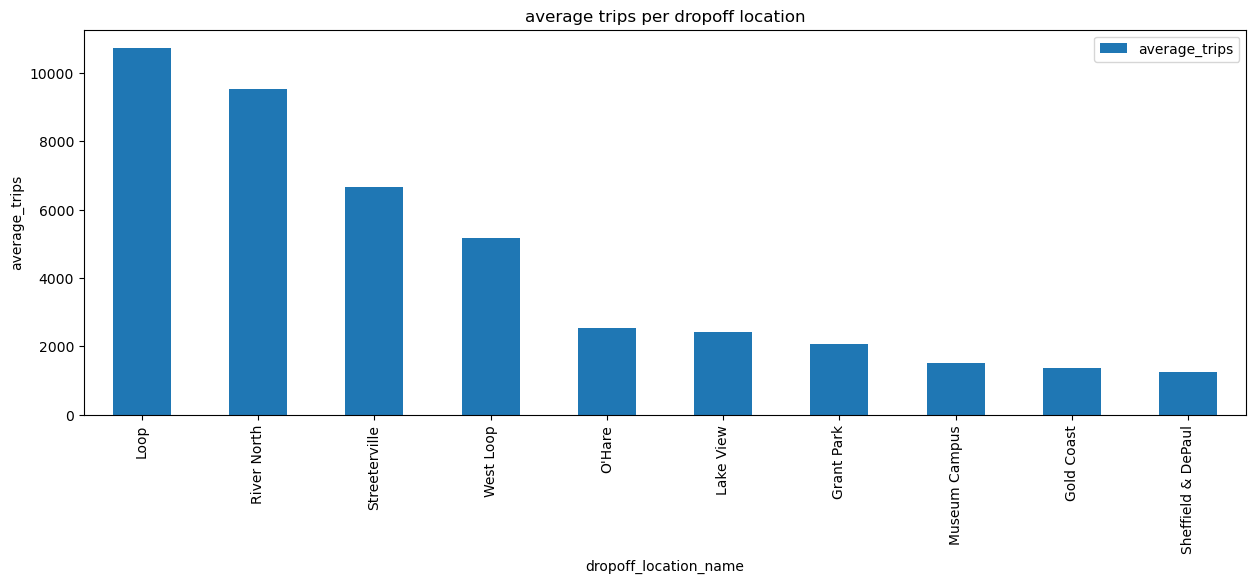

In [26]:
bar_graph_sorted(trips_shorted, "dropoff_location_name", "average_trips", "sum", "average_trips", "average trips per dropoff location")

Al igual que con el dataframe anterior podemos observar que la mayoría de los viajes finalizan en una pequeña concentración de alrededor de 12 barrios versus los 94 que componen la muestra. Observando los 10 principales barrios de termino de los recorridos podemos concluir que los favoritos de la gente son "Loop", seguido de "River North", "Streeterville" y "West Loop", a partir de "O'Hare" la cantidad de viajes se vuelve más o menos pareja entre los siguientes 6 barrios para después, como se aprecia en el primer gráfico, comenzar a descender las visitas hasta ser anecdóticas desde el puesto 30 en adelante.

## 6. Prueba de hipótesis <a name="hypothesis"></a>

Procederemos a realizar una prueba de hipótesis con respecto a igualdad de medias en dos poblaciones para determinar si la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. Comenzaremos definiendo una función para crear un histograma y continuaremos realizando una prueba de Levene para poder verificar como definir el parámetro "equal_var" en la prueba de hipótesis de comparación de medias que realizaremos a continuación.

In [27]:
def histogram(data, columna, ylabel, title):
    data.hist(column=columna, bins=100, figsize=(15,5))
    plt.xlabel(columna)
    plt.ylabel(ylabel)
    plt.title(title)
    return data[columna].describe()

count     888.000000
mean     1999.675676
std       759.198268
min         0.000000
25%      1389.750000
50%      1800.000000
75%      2460.000000
max      7440.000000
Name: duration_seconds, dtype: float64

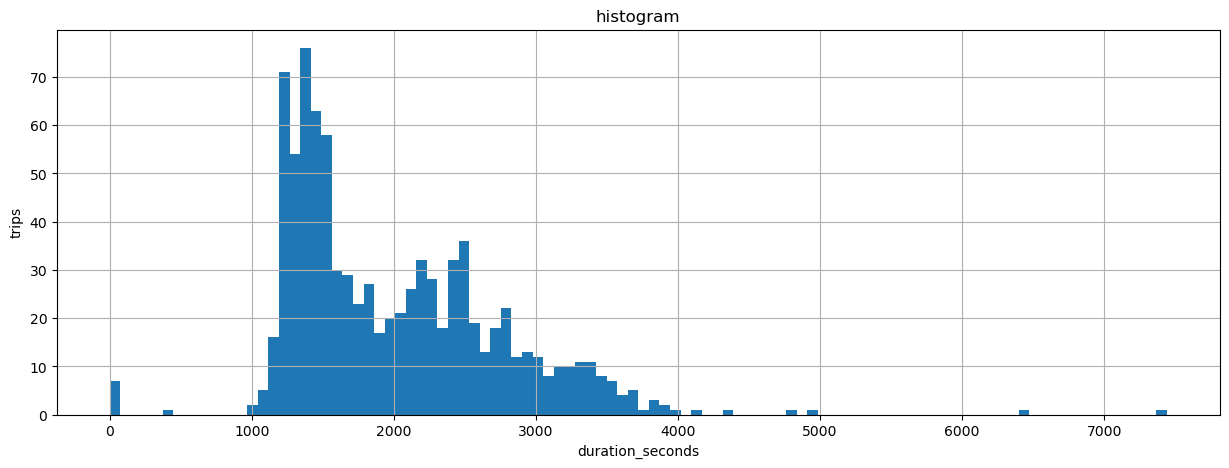

In [28]:
histogram(weather_trips[weather_trips["weather_conditions"]=="Good"], "duration_seconds", "trips", "histogram")

count     180.000000
mean     2427.205556
std       721.314138
min       480.000000
25%      1962.000000
50%      2540.000000
75%      2928.000000
max      4980.000000
Name: duration_seconds, dtype: float64

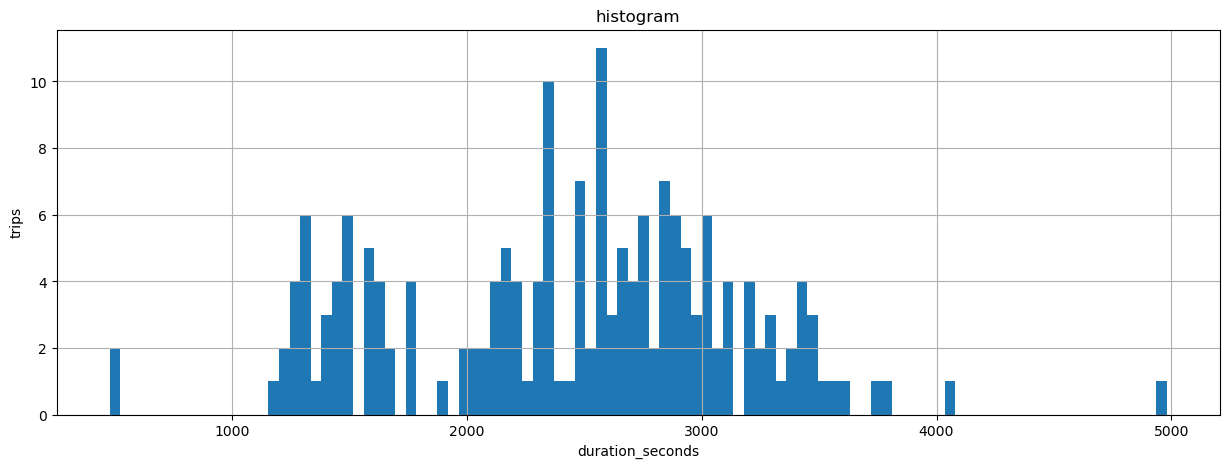

In [29]:
histogram(weather_trips[weather_trips["weather_conditions"]=="Bad"], "duration_seconds", "trips", "histogram")

Al observar el histograma, las medias y medianas de la duración de los viajes para condiciones climáticas "buenas" y "malas" podemos notar que tienen distribuciones sesgadas por lo que en la prueba de Levene utilizaremos center = "median".

In [30]:
st.levene(weather_trips[weather_trips["weather_conditions"]=="Good"]["duration_seconds"],weather_trips[weather_trips["weather_conditions"]=="Bad"]["duration_seconds"],center="median")

LeveneResult(statistic=0.38853489683656073, pvalue=0.5332038671974493)

Podemos apreciar que el pvalue es de un 53% por lo que al ser mayor que nuestro valor alfa de referencia de 5% no tenemos suficiente evidencia para rechazar la hipótesis de que las varianzas de ambas calificaciones promedio son iguales, por lo que las trataremos como iguales en la prueba de hipótesis de comparación de medias.

Ahora continuaremos comprobando la hipótesis de que la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos, para este caso definiremos la hipótesis nula como que la duración promedio de los viajes no cambia ya que normalmente se define la hipótesis nula como que no hay variaciones entre los valores estudiados. Para el caso del valor alfa utilizaremos el valor del 5% por ser una medida común de significación estadística.

In [31]:
alpha = 0.05

In [32]:
results = st.ttest_ind(weather_trips[weather_trips["weather_conditions"]=="Good"]["duration_seconds"], weather_trips[weather_trips["weather_conditions"]=="Bad"]["duration_seconds"],equal_var=True)

In [33]:
print('p-value:', results.pvalue)

p-value: 6.517970327099473e-12


In [34]:
if (results.pvalue < alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No rechazamos la hipótesis nula")

Rechazamos la hipótesis nula


Realizada la prueba de hipótesis podemos comprobar que se rechazó la hipótesis nula, es decir la duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos. el p-value es de 6.51797e-12 aprox, es decir que existe una probabilidad infima de obtener un valor de igualdad de calificaciones en ambas plataformas como hemos establecido en la hipótesis nula, al ser este valor tan bajo es muy poco probable de la diferencia entre calificaciones sea debido al azar y por esto es rechazada la hipótesis nula.

## 7. Conclusión General <a name="end"></a>

Comenzamos el proyecto con una exploración de los dataframes otorgados por Zuber, de los tres dataframe solo uno debió de ser abordado cambiando los tipos de datos de dos columnas para poder hacer mejor uso del mismo durante el análisis posterior.

Continuamos con un análisis a través de la elaboración de gráficos de barras para los dataframes de cantidad de viajes versus compañías de taxis y promedios de viajes versus barrios en donde terminaron los viajes. 

Del primer dataframe podemos concluir que existe una clara preferencia por parte de los usuarios por la compañía de taxis "Flash Cab", en el caso de que Zuber quisiera asociarse con alguna compañía de taxis en específico seria está el principal objetivo a considerar al tener una cantidad de viajes mucho mayor al resto de las compañías, igualmente son de considerar las compañías que se encuentren en el top 10 de cantidad de viajes, pasado este top 10 los viajes descenderán hasta ser mínimos en comparación con lo anteriormente abordado.

Del segundo dataframe podemos rescatar conclusiones parecidas al primero, existe un grupo de barrios los cuales son los más populares como destino de llegada de los viajes, siendo los más importantes a considerar en orden "Loop", "River North", "Streeterville" y "West Loop, los siguientes 6 barrios también poseen una cantidad de viajes a considerar pero a partir del décimo tercer barrio la cantidad de viajes disminuye hasta dejar de ser relevantes. En este caso no existe un barrio que se destaque tanto como en el caso de las compañías de taxis, encontrándose los dos primeros lugares más o menos parejos.

Finalmente se procedió a comprobar si los tiempos de viajes realizados desde el Loop hasta el Aeropuerto Internacional O'Hare cambiaban los dias sábados lluviosos, para esto se realizó una prueba de Levene para decidir el valor del parámetro equal_var y después se realizó la prueba de hipótesis definiendo como hipótesis nula que los tiempos no variaban, ya que tradicionalmente se elige como hipótesis nula que no hay variaciones entre los valores estudiados, y como valor alpha se escogió un 5% por ser también un valor habitual de referencia. Al realizar la prueba de hipótesis se obtuvo un p-value muy inferior al 5% del valor alpha escogido por lo que se procedió a rechazar la hipótesis nula y declarar que si existen variaciones de tiempo en los viajes los días sábados lluviosos.